# Proyecto Machine Learning del Precio del Alquiler en España  
  
## Índice  
  
## Importación de librerías<a id='0'></a> 

In [67]:
# Se importan las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import utils.functions2 as fn
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
import pickle
from sklearn.compose import ColumnTransformer
import re

## 1. Introducción<a id='1'></a>  
  
Tras, haber realizado anteriormente un análisis exploratorio de datos (**EDA** de sus siglas en inglés), se procede a dar un paso más allá y se quiere intentar predecir el precio de nuevos municipios que no se hayan podido tener en cuenta en los datos anteriores. Esto simplificaría notablemente la tarea de  recolección de datos y, unificado a un modelo de series temporales, podría ayudar a la predicción del precio de nuevos municipios en un futuro.  
  
## 2. Objetivo<a id='2'></a>  
  
El objetivo de este trabajo es **obtener** un **modelo** de machine learning que **prediga** los **precios del alquiler** en los diversos municipios de España.  
  
## 3. Datos<a id='3'></a>  
  
Para cumplir el objetivo de esta tarea, se utilizaran los datos recolectados y limpiados en el anterior **EDA** que hacían referencia al alquiler en 2021. Esto es así debido a que este año es el último año donde se tienen todos los datos recolectados. Por ello, se importa el dataset *df_alquiler_2020_21_processed.csv*.

In [65]:
# Se importa el dataset con los datos
df_init = pd.read_csv("data/raw/df_alquiler_2020_21_processed.csv", sep=";", index_col=0)

### 3.1. Observación inicial de datos <a id='31'></a> 
  
Se realiza una visualización rápida de los datos.

In [34]:
# Se imprimen las primeras 5 filas
df_init.head()

,Codigo_provincia,Provincia,Codigo_municipio,Total_vc_2020,Total_vu_2020,Alquiler_mes_vc_m2_2020,Alquiler_mes_vu_m2_2020,Total_vc_2021,Total_vu_2021,Alquiler_mes_vc_m2_2021,...,Porcentaje_viviendas_turisticas_2020,Total_casas_alquiler_2020,Porcentaje_viviendas_alquiler_2020,Porcentaje_vc_alquiler_2020,Porcentaje_vu_alquiler_2020,Porcentaje_viviendas_turisticas_2021,Total_casas_alquiler_2021,Porcentaje_viviendas_alquiler_2021,Porcentaje_vc_alquiler_2021,Porcentaje_vu_alquiler_2021
Abadín,27,Lugo,27001,204.615385,11.0,2.793878,1.346634,0.0,9.0,2.821674,...,0.300842,215.615385,12.973248,12.311395,0.661853,0.601685,9.0,0.541516,0.000000,0.541516
Abanilla,30,Murcia,30001,15.000000,22.0,3.036911,1.546392,20.0,27.0,3.016350,...,0.401517,37.000000,0.825340,0.334597,0.490743,0.758421,47.0,1.048405,0.446130,0.602275
Abarán,30,Murcia,30002,188.000000,54.0,2.961165,2.727273,193.0,52.0,3.000000,...,0.015117,242.000000,3.658352,2.842026,0.816327,0.120937,245.0,3.703704,2.917611,0.786092
Abegondo,15,"Coruña, A",15001,7.000000,60.0,3.585766,3.200000,7.0,56.0,3.660036,...,0.255836,67.000000,2.142629,0.223857,1.918772,0.543652,63.0,2.014711,0.223857,1.790854
Abrera,8,Barcelona,8001,374.000000,153.0,6.782946,6.734083,383.0,140.0,7.142857,...,0.243263,527.000000,9.861527,6.998503,2.863024,0.449102,523.0,9.786677,7.166916,2.619760


In [20]:
# Se imprime la información básica del dataframe
df_init.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2033 entries, Abadín to Úbeda
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Codigo_provincia                      2033 non-null   int64  
 1   Provincia                             2033 non-null   object 
 2   Codigo_municipio                      2033 non-null   int64  
 3   Total_vc_2020                         2033 non-null   float64
 4   Total_vu_2020                         2033 non-null   float64
 5   Alquiler_mes_vc_m2_2020               2033 non-null   float64
 6   Alquiler_mes_vu_m2_2020               2033 non-null   float64
 7   Total_vc_2021                         2033 non-null   float64
 8   Total_vu_2021                         2033 non-null   float64
 9   Alquiler_mes_vc_m2_2021               2033 non-null   float64
 10  Alquiler_mes_vu_m2_2021               2033 non-null   float64
 11  Comunidad_autono

In [21]:
# Se obtiene un análisis estadístico rápido del dataframe
df_init.describe()

,Codigo_provincia,Codigo_municipio,Total_vc_2020,Total_vu_2020,Alquiler_mes_vc_m2_2020,Alquiler_mes_vu_m2_2020,Total_vc_2021,Total_vu_2021,Alquiler_mes_vc_m2_2021,Alquiler_mes_vu_m2_2021,...,Porcentaje_viviendas_turisticas_2020,Total_casas_alquiler_2020,Porcentaje_viviendas_alquiler_2020,Porcentaje_vc_alquiler_2020,Porcentaje_vu_alquiler_2020,Porcentaje_viviendas_turisticas_2021,Total_casas_alquiler_2021,Porcentaje_viviendas_alquiler_2021,Porcentaje_vc_alquiler_2021,Porcentaje_vu_alquiler_2021
count,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,...,2033.000000,2033.00000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000
mean,24.630103,24728.374816,863.826968,108.001542,4.590670,3.685202,888.735253,111.439752,4.761812,3.835967,...,1.135120,971.82851,6.504461,4.817282,1.687179,2.210585,1000.175005,6.060227,4.324845,1.735382
std,14.398262,14396.898838,6716.929723,186.783305,1.688096,1.503601,6953.047247,192.373629,1.754545,1.551642,...,2.438868,6826.52737,6.521453,6.117396,1.640207,4.785380,7065.619083,4.644640,4.101835,1.655592
min,2.000000,2003.000000,1.000000,0.000000,1.648352,0.881049,0.000000,0.000000,1.691968,1.164412,...,0.000000,2.00000,0.049318,0.008220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,11030.000000,30.000000,20.000000,3.313753,2.590191,24.000000,21.000000,3.428956,2.703437,...,0.082610,62.00000,2.321429,1.052950,0.568720,0.168103,58.000000,2.236422,0.950540,0.611933
50%,24.000000,24223.000000,121.000000,51.000000,4.166667,3.333333,108.000000,52.000000,4.324324,3.454601,...,0.265957,184.00000,4.985472,3.182257,1.073208,0.533511,175.000000,4.904925,3.116939,1.117735
75%,38.000000,38030.000000,421.000000,124.000000,5.483860,4.455446,412.000000,126.000000,5.714286,4.602713,...,0.915192,553.00000,9.226826,6.932277,2.268405,1.789264,550.000000,9.196740,6.633785,2.317042
max,52.000000,52001.000000,256903.000000,2981.000000,12.121212,14.024390,266196.000000,3062.000000,12.437483,14.045214,...,23.771915,259884.00000,81.770074,77.921453,13.374309,52.586357,269258.000000,31.004103,27.716049,13.730793


Se eliminan todas las columnas que aportan datos del año 2020, ya que son datos que no usaremos para entrenar al modelo.

In [80]:
col = [col for col in df_init.columns if col.endswith("2020")]
col

['Total_vc_2020',
 'Total_vu_2020',
 'Alquiler_mes_vc_m2_2020',
 'Alquiler_mes_vu_m2_2020',
 'Poblacion_2020',
 'Viviendas_turisticas_2020',
 'Turistas_2020',
 'Porcentaje_viviendas_turisticas_2020',
 'Total_casas_alquiler_2020',
 'Porcentaje_viviendas_alquiler_2020',
 'Porcentaje_vc_alquiler_2020',
 'Porcentaje_vu_alquiler_2020']

In [22]:
# Se crea una lista con las columnas cuyo nombre termina en "2020"
col_to_drop = [col for col in df_init.columns if col.endswith("2020")]

# Se eliminan las variables con 2020 al final
df_2021 = df_init.drop(col_to_drop, axis=1)
df_2021.head()

,Codigo_provincia,Provincia,Codigo_municipio,Total_vc_2021,Total_vu_2021,Alquiler_mes_vc_m2_2021,Alquiler_mes_vu_m2_2021,Comunidad_autonoma,Poblacion_2021,Inmuebles_totales,Viviendas_turisticas_2021,Turistas_2021,Porcentaje_viviendas_turisticas_2021,Total_casas_alquiler_2021,Porcentaje_viviendas_alquiler_2021,Porcentaje_vc_alquiler_2021,Porcentaje_vu_alquiler_2021
Abadín,27,Lugo,27001,0.0,9.0,2.821674,2.205769,Galicia,2297.0,1662.0,10,2147,0.601685,9.0,0.541516,0.000000,0.541516
Abanilla,30,Murcia,30001,20.0,27.0,3.016350,2.500000,"Murcia, Región de",6116.0,4483.0,34,23013,0.758421,47.0,1.048405,0.446130,0.602275
Abarán,30,Murcia,30002,193.0,52.0,3.000000,2.876485,"Murcia, Región de",13066.0,6615.0,8,3356,0.120937,245.0,3.703704,2.917611,0.786092
Abegondo,15,"Coruña, A",15001,7.0,56.0,3.660036,3.473607,Galicia,5494.0,3127.0,17,4365,0.543652,63.0,2.014711,0.223857,1.790854
Abrera,8,Barcelona,8001,383.0,140.0,7.142857,7.054119,Cataluña,12620.0,5344.0,24,43430,0.449102,523.0,9.786677,7.166916,2.619760


Se elimina la variable *provincia* debido a que esa información queda reflejada en la variable *Codigo_provincia*. También se elimina la variable *Codigo_municipio* porque la información que aparece es redundante con la información perteneciente al índice.

In [23]:
df_2021.to_csv("app/data/current_year_data.csv", sep=";", index=True)

In [5]:
# Se eliminan las variables Provincia y Codigo_municipio
df_2021.drop(["Provincia", "Codigo_municipio", "Codigo_provincia"],axis=1, inplace=True)
df_2021.head()

,Total_vc_2021,Total_vu_2021,Alquiler_mes_vc_m2_2021,Alquiler_mes_vu_m2_2021,Comunidad_autonoma,Poblacion_2021,Inmuebles_totales,Viviendas_turisticas_2021,Turistas_2021,Porcentaje_viviendas_turisticas_2021,Total_casas_alquiler_2021,Porcentaje_viviendas_alquiler_2021,Porcentaje_vc_alquiler_2021,Porcentaje_vu_alquiler_2021
Abadín,0.0,9.0,2.821674,2.205769,Galicia,2297.0,1662.0,10,2147,0.601685,9.0,0.541516,0.000000,0.541516
Abanilla,20.0,27.0,3.016350,2.500000,"Murcia, Región de",6116.0,4483.0,34,23013,0.758421,47.0,1.048405,0.446130,0.602275
Abarán,193.0,52.0,3.000000,2.876485,"Murcia, Región de",13066.0,6615.0,8,3356,0.120937,245.0,3.703704,2.917611,0.786092
Abegondo,7.0,56.0,3.660036,3.473607,Galicia,5494.0,3127.0,17,4365,0.543652,63.0,2.014711,0.223857,1.790854
Abrera,383.0,140.0,7.142857,7.054119,Cataluña,12620.0,5344.0,24,43430,0.449102,523.0,9.786677,7.166916,2.619760


In [6]:
df_2021.columns = [re.sub(r"_20\d{2}$", '', col) for col in df_2021.columns]

In [51]:
df_2021.columns

Index(['Total_vu', 'Alquiler_mes_vc_m2', 'Alquiler_mes_vu_m2',
       'Comunidad_autonoma', 'Turistas', 'Porcentaje_vc_alquiler',
       'Porcentaje_vu_alquiler'],
      dtype='object')

### 3.2. EDA<a id='32'></a>

Se procede a realizar un EDA rápido, haciendo el análisis univariante y el análisis vibariante. Para ello, se usan funciones propias.

Análisis univariante de Total_vc:


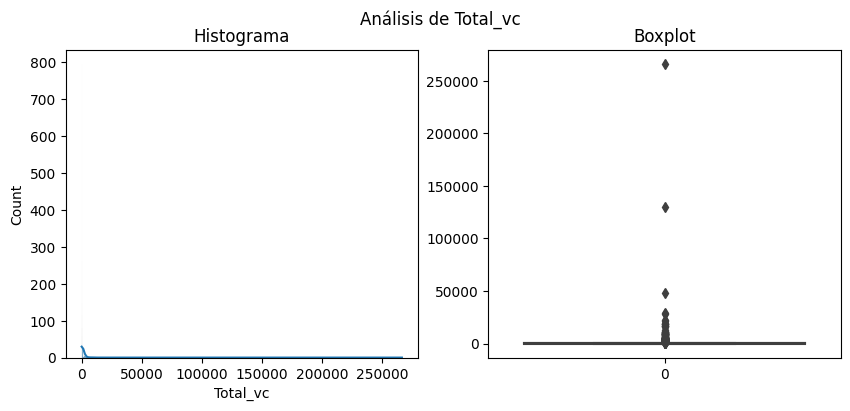

La columna Total_vc no presenta una distribución normal



Análisis univariante de Total_vu:


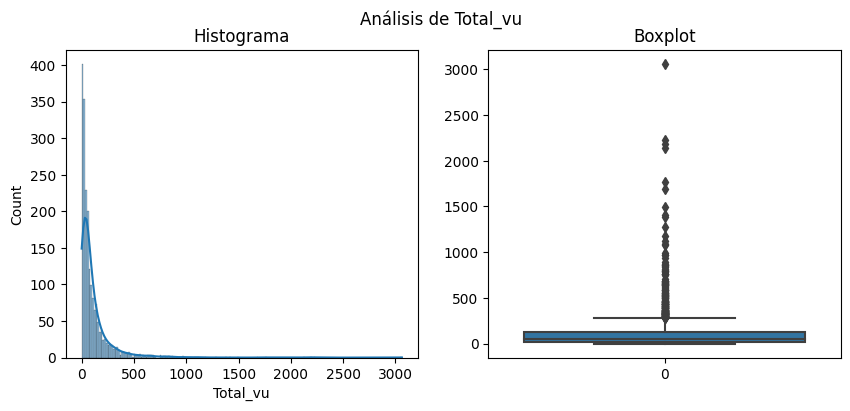

La columna Total_vu no presenta una distribución normal



Análisis univariante de Alquiler_mes_vc_m2:


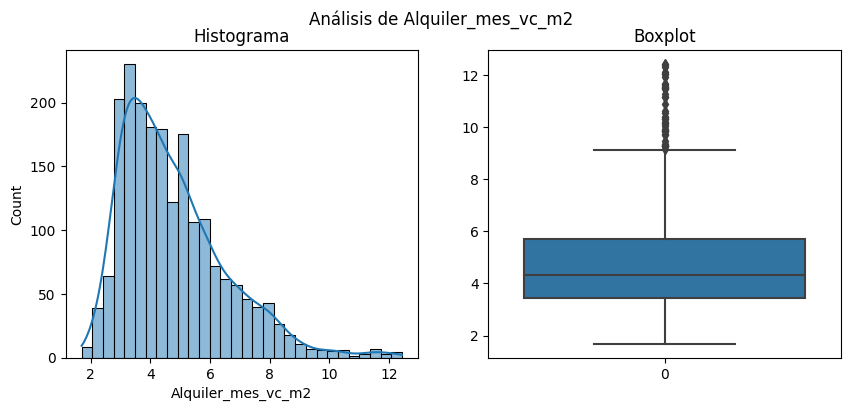

La columna Alquiler_mes_vc_m2 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vu_m2:


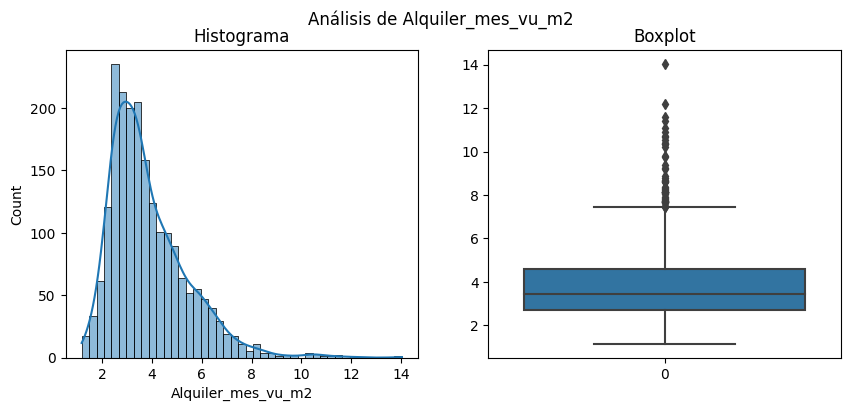

La columna Alquiler_mes_vu_m2 no presenta una distribución normal



Análisis univariante de Comunidad_autonoma:
Variable categórica:
-Valores únicos:
Comunidad_autonoma
Andalucía                  417
Cataluña                   342
Comunitat Valenciana       216
Galicia                    208
Castilla-La Mancha         185
Castilla y León            127
Madrid, Comunidad de       109
Extremadura                 88
Canarias                    80
Aragón                      60
Balears, Illes              52
Cantabria                   47
Asturias, Principado de     42
Murcia, Región de           38
Rioja, La                   20
Ceuta                        1
Melilla                      1
Name: count, dtype: int64
-Número de valores únicos: 17




Análisis univariante de Poblacion:


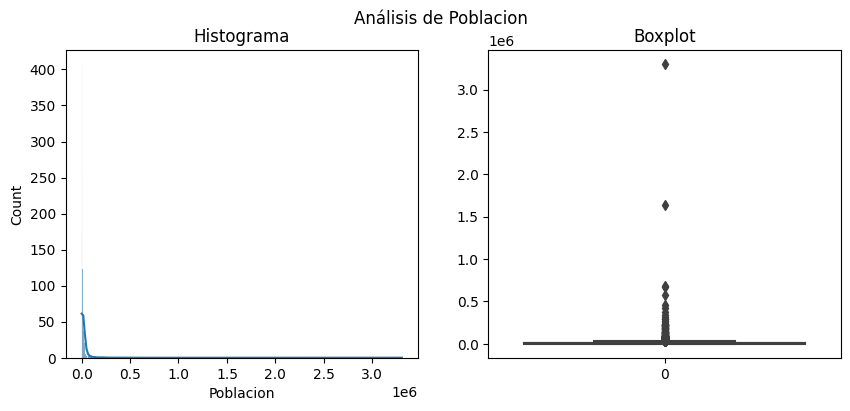

La columna Poblacion no presenta una distribución normal



Análisis univariante de Inmuebles_totales:


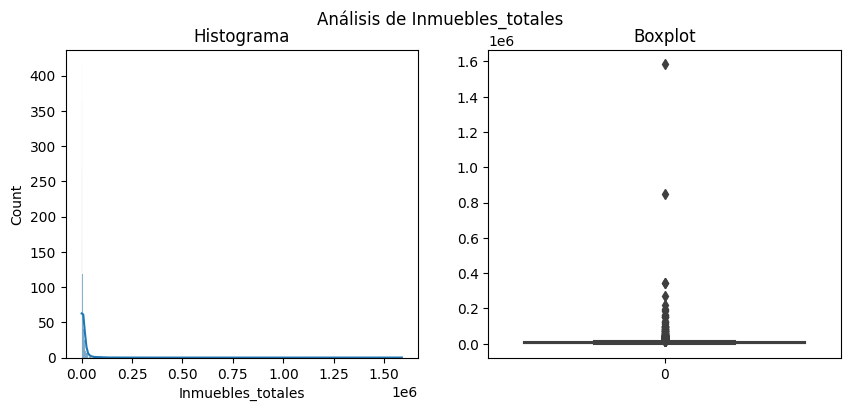

La columna Inmuebles_totales no presenta una distribución normal



Análisis univariante de Viviendas_turisticas:


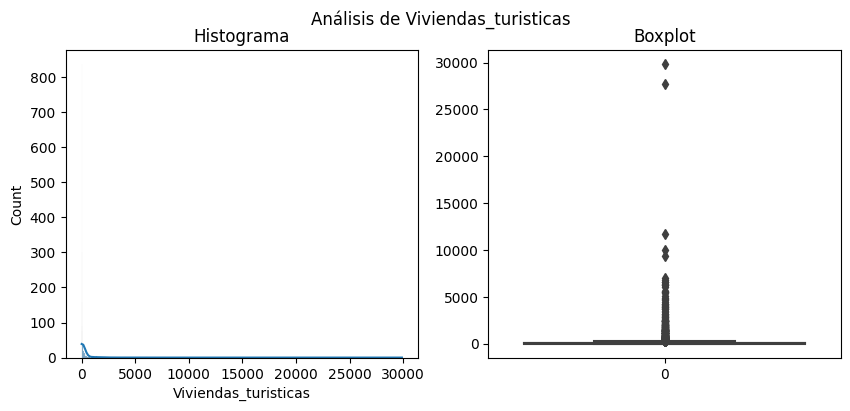

La columna Viviendas_turisticas no presenta una distribución normal



Análisis univariante de Turistas:


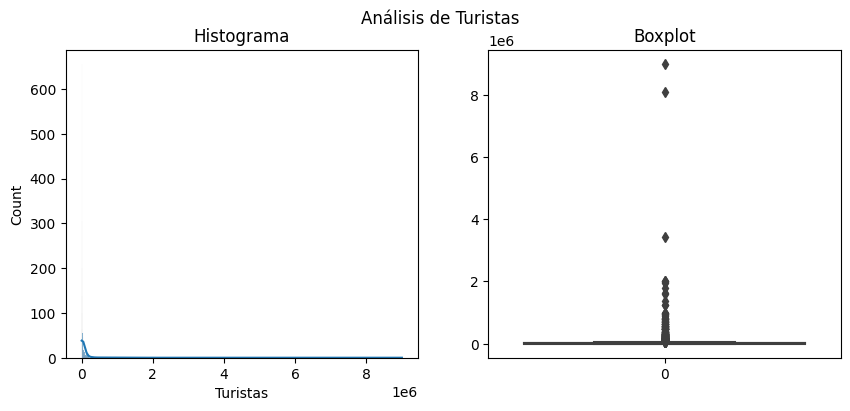

La columna Turistas no presenta una distribución normal



Análisis univariante de Porcentaje_viviendas_turisticas:


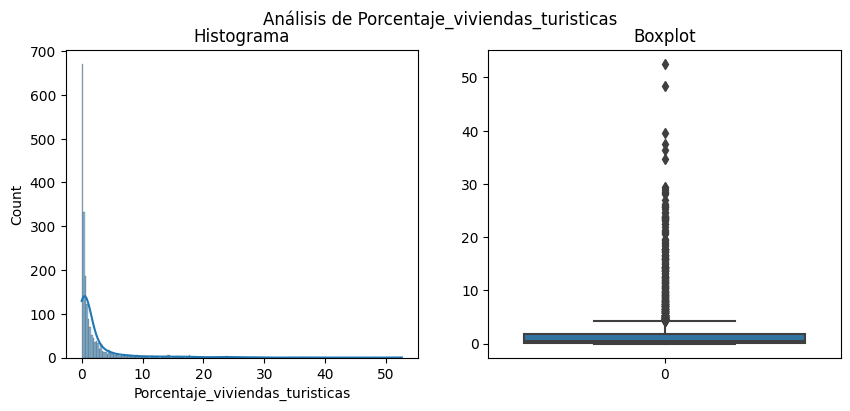

La columna Porcentaje_viviendas_turisticas no presenta una distribución normal



Análisis univariante de Total_casas_alquiler:


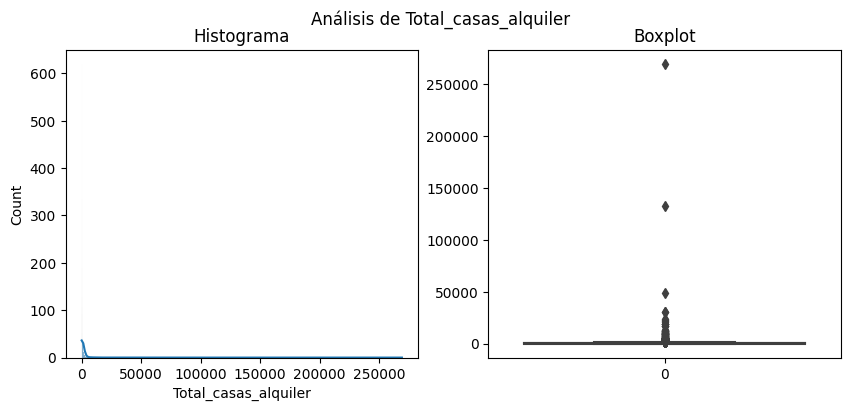

La columna Total_casas_alquiler no presenta una distribución normal



Análisis univariante de Porcentaje_viviendas_alquiler:


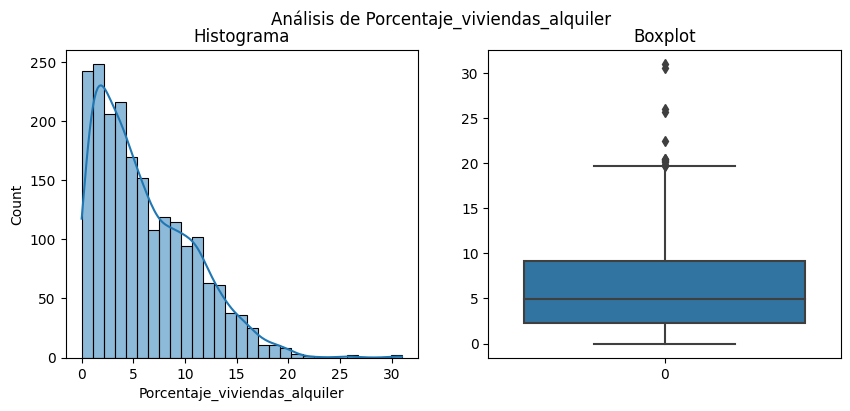

La columna Porcentaje_viviendas_alquiler no presenta una distribución normal



Análisis univariante de Porcentaje_vc_alquiler:


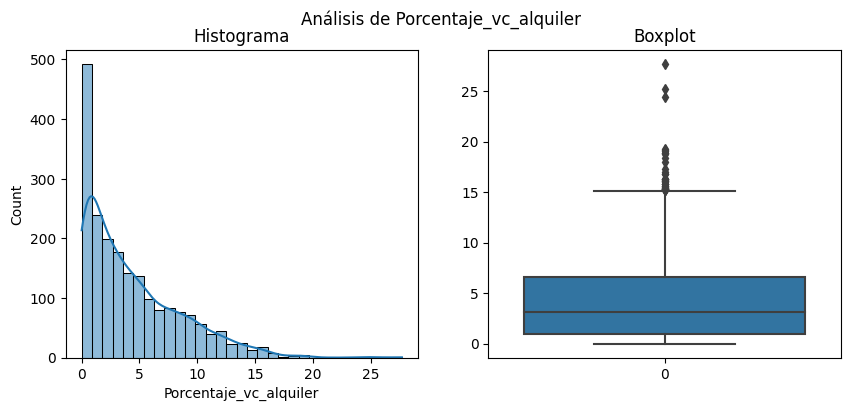

La columna Porcentaje_vc_alquiler no presenta una distribución normal



Análisis univariante de Porcentaje_vu_alquiler:


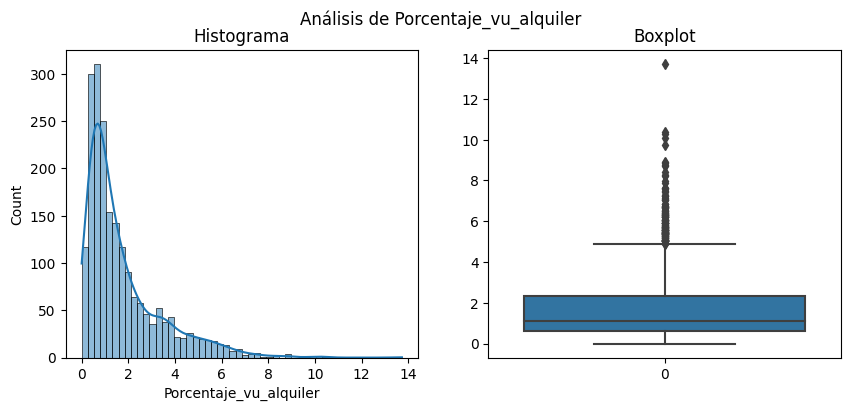

La columna Porcentaje_vu_alquiler no presenta una distribución normal



Número de variables que siguen una distribución normal: 0
Número de variables que no siguen una distribución normal: 13


,Mean,Median,Mode,Variance,Standart_desv,Percentil_25,Percentil_75,K_test,p_value,Distribution
Features,,,,,,,,,,
Total_vc,888.735253,108.000000,0.000000,4.834487e+07,6953.047247,24.000000,412.000000,0.935197,0.0,Not standart
Total_vu,111.439752,52.000000,15.000000,3.700761e+04,192.373629,21.000000,126.000000,0.989796,0.0,Not standart
Alquiler_mes_vc_m2,4.761812,4.324324,4.939062,3.078430e+00,1.754545,3.428956,5.714286,0.978528,0.0,Not standart
Alquiler_mes_vu_m2,3.835967,3.454601,2.527683,2.407593e+00,1.551642,2.703437,4.602713,0.939759,0.0,Not standart
Poblacion,19960.828578,6152.000000,2135.000000,8.417442e+09,91746.620857,3267.000000,15017.000000,1.000000,0.0,Not standart
Inmuebles_totales,10565.331038,3522.000000,1873.000000,2.036231e+09,45124.614835,2005.000000,8016.000000,1.000000,0.0,Not standart
Viviendas_turisticas,264.968519,22.000000,0.000000,1.445644e+06,1202.349368,6.000000,99.000000,0.878873,0.0,Not standart
Turistas,61143.727496,8619.000000,30.000000,1.022775e+11,319808.513973,2741.000000,27044.000000,1.000000,0.0,Not standart
Porcentaje_viviendas_turisticas,2.210585,0.533511,0.000000,2.289986e+01,4.785380,0.168103,1.789264,0.500000,0.0,Not standart


In [26]:
# Se reraliza el análisis univariante del dataframe

fn.get_univariate_analysis(df_2021)

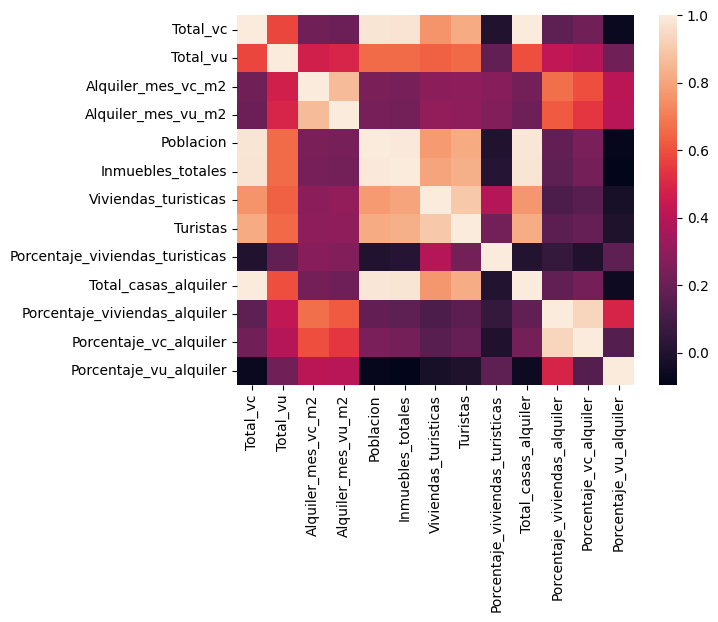

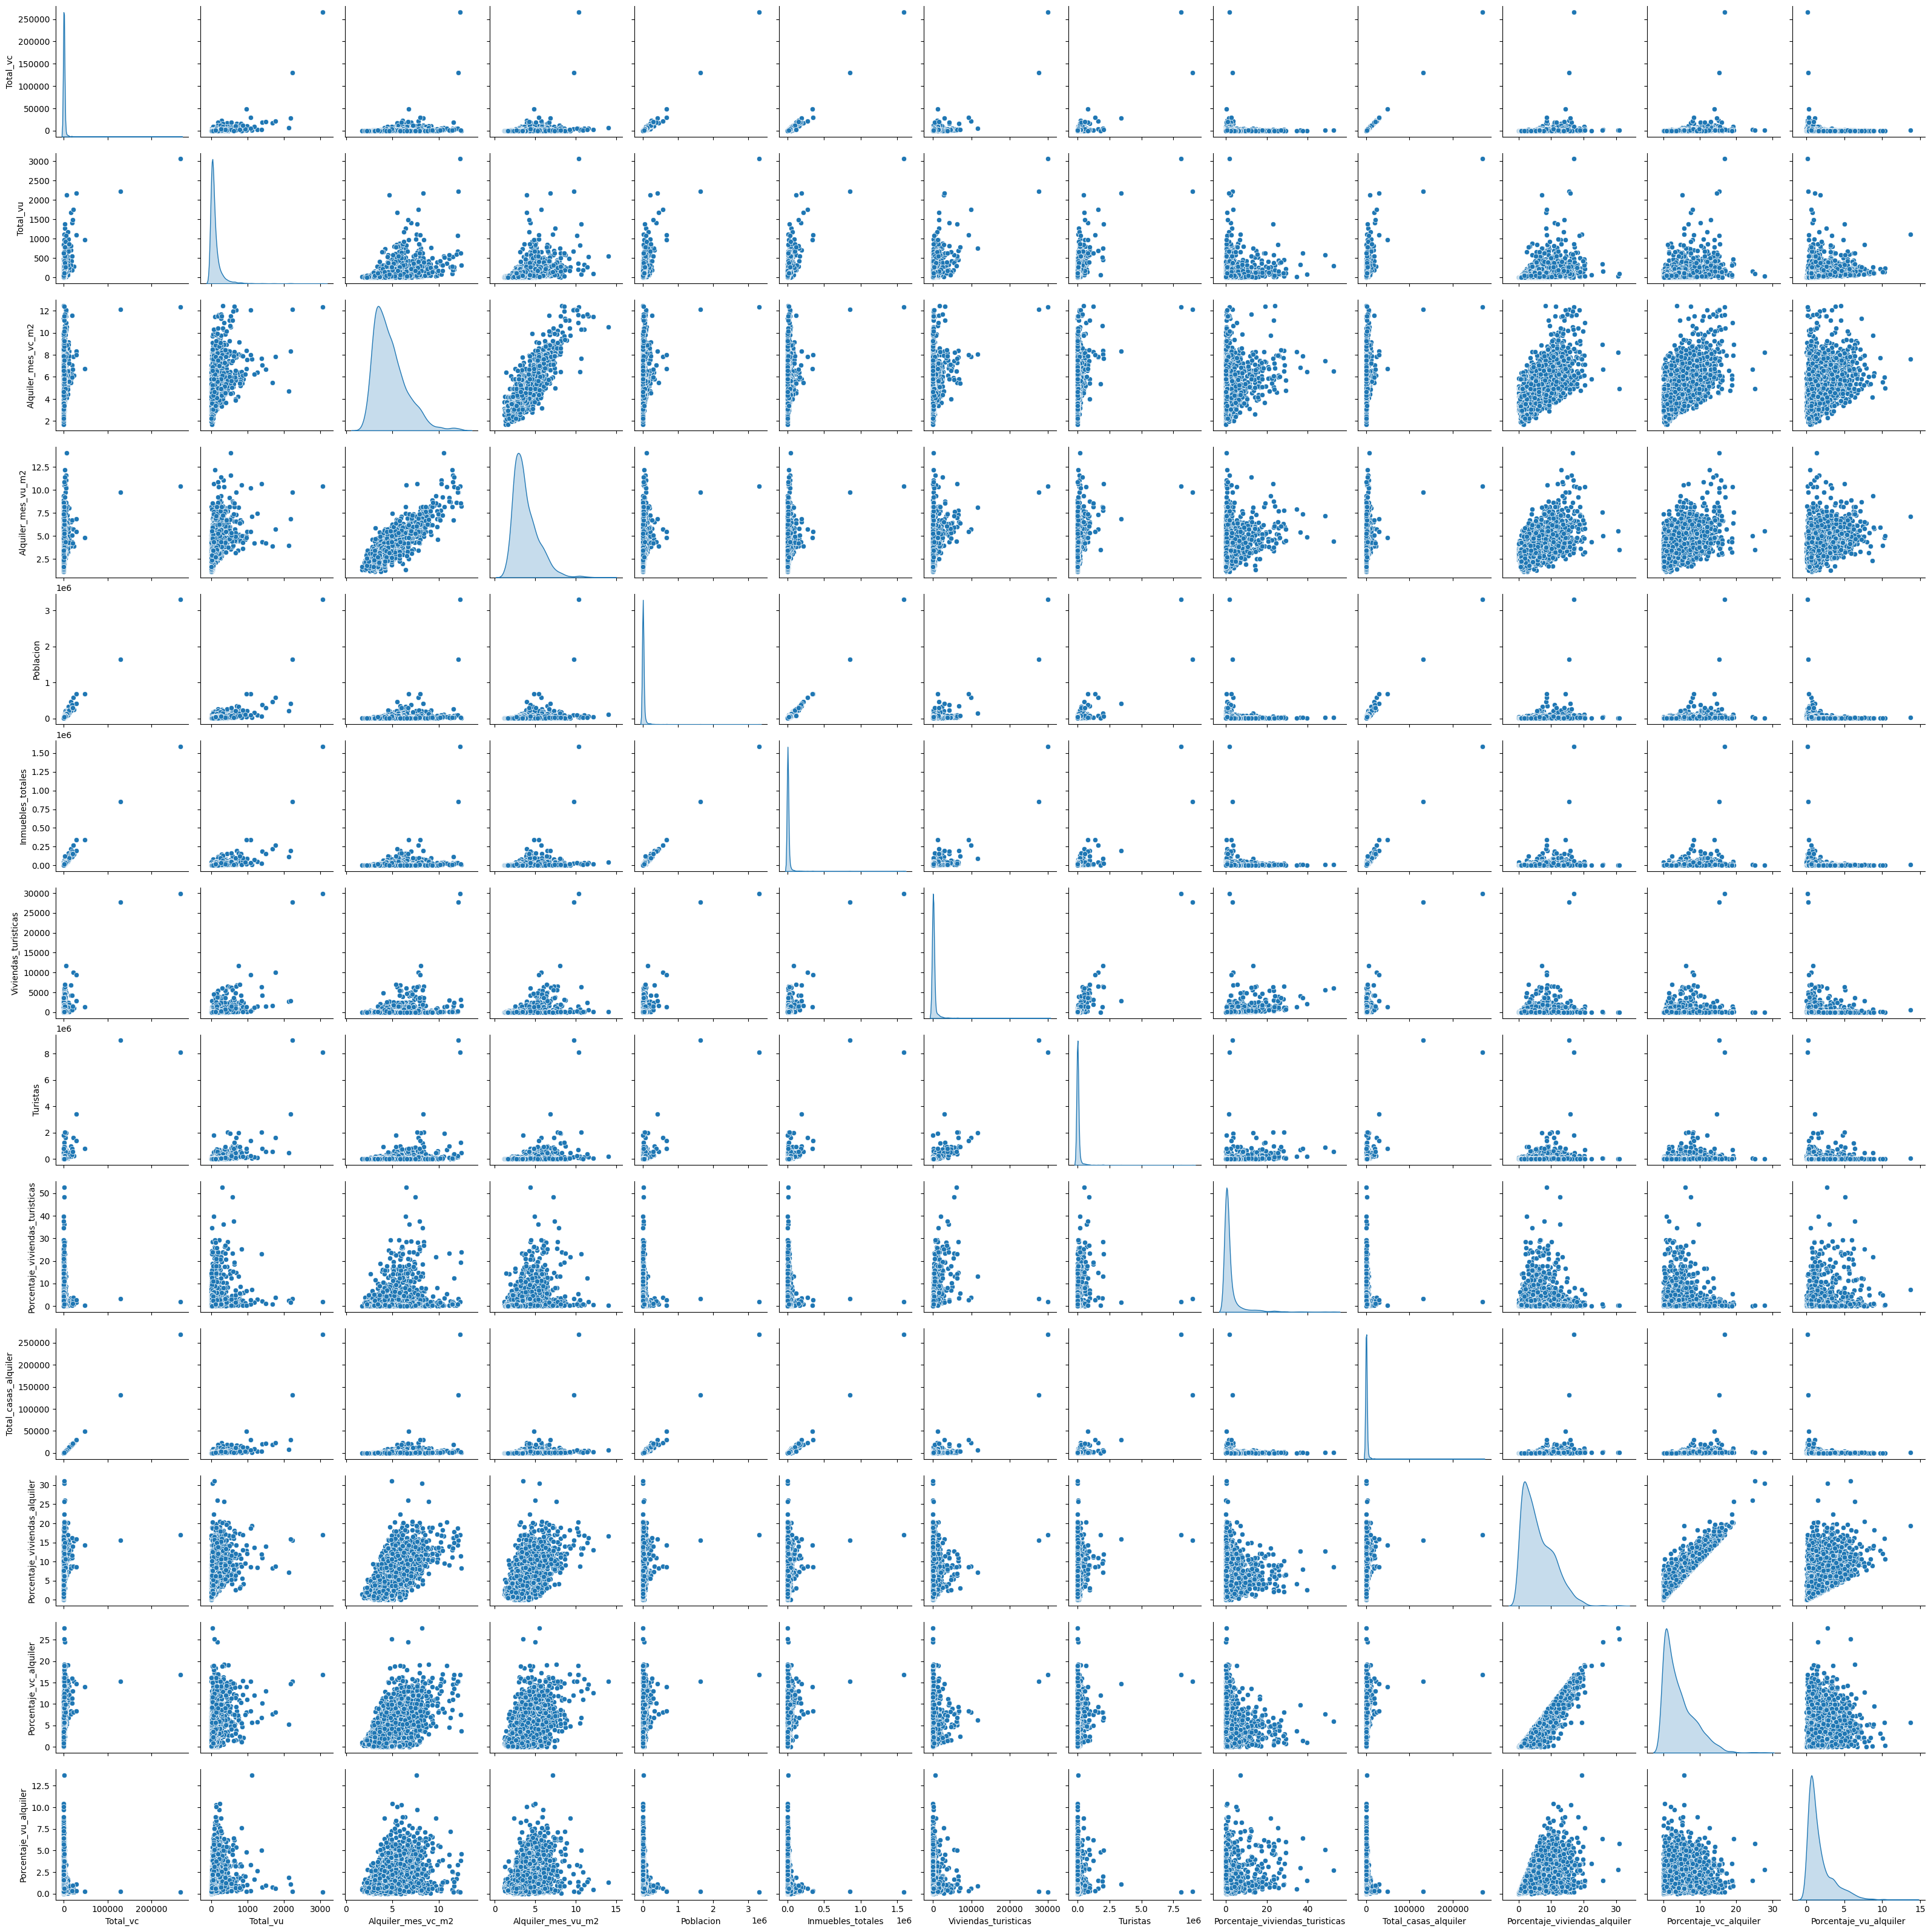

In [27]:
# Se realiza el análisis bivariante de dataframe

fn.get_bivariate_analysis(df_2021)

In [12]:
df_2021.columns

Index(['Total_vc', 'Total_vu', 'Alquiler_mes_vc_m2', 'Alquiler_mes_vu_m2',
       'Comunidad_autonoma', 'Poblacion', 'Inmuebles_totales',
       'Viviendas_turisticas', 'Turistas', 'Porcentaje_viviendas_turisticas',
       'Total_casas_alquiler', 'Porcentaje_viviendas_alquiler',
       'Porcentaje_vc_alquiler', 'Porcentaje_vu_alquiler'],
      dtype='object')

## 3.3. Preparación de datos<a id='33'></a>  
  
Tras realizar el eda, observamos que todavía quedan columnas que no son numéricas, se procede a cambiarlas a numéricas.

In [26]:
# from sklearn.preprocessing import OneHotEncoder


# ohe = OneHotEncoder()
# ohe.fit(np.array(df_2021[["Comunidad_autonoma"]]))

# df_2021 = pd.concat([df_2021, pd.DataFrame(ohe.transform(df_2021[["Comunidad_autonoma"]]).toarray(), columns = ohe.get_feature_names_out(), index=df_2021.index)], axis = 1).drop(["Comunidad_autonoma"], axis=1)
# df_2021.head()

,Codigo_provincia,Total_vc_2021,Total_vu_2021,Alquiler_mes_vc_m2_2021,Alquiler_mes_vu_m2_2021,Poblacion_2021,Inmuebles_totales,Viviendas_turisticas_2021,Turistas_2021,Porcentaje_viviendas_turisticas_2021,...,x0_Castilla-La Mancha,x0_Cataluña,x0_Ceuta,x0_Comunitat Valenciana,x0_Extremadura,x0_Galicia,"x0_Madrid, Comunidad de",x0_Melilla,"x0_Murcia, Región de","x0_Rioja, La"
Abadín,27,0.0,9.0,2.821674,2.205769,2297.0,1662.0,10,2147,0.601685,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Abanilla,30,20.0,27.0,3.016350,2.500000,6116.0,4483.0,34,23013,0.758421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Abarán,30,193.0,52.0,3.000000,2.876485,13066.0,6615.0,8,3356,0.120937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Abegondo,15,7.0,56.0,3.660036,3.473607,5494.0,3127.0,17,4365,0.543652,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Abrera,8,383.0,140.0,7.142857,7.054119,12620.0,5344.0,24,43430,0.449102,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
le = OrdinalEncoder()
df_2021[["Comunidad_autonoma"]] = le.fit_transform(df_2021[["Comunidad_autonoma"]])
df_2021["Comunidad_autonoma"].values

array([12., 15., 15., ...,  6.,  0.,  0.])

In [36]:
df_2021["Comunidad_autonoma"].unique()

array([12., 15.,  8.,  0.,  4.,  6., 10., 13.,  1.,  3.,  7., 16., 11.,
        5.,  2.,  9., 14.])

## 3.4. Exportación de datos<a id='34'></a>  
  
Se exportan los datos a un archivo csv separado por **;** para tener los datos más a mano.

In [30]:
df_2021.to_csv("data/processed/data_2021_processed.csv", sep=";", index=True)

# 4. Baselines<a id='4'></a>  
  
Se realiza el baseline para obtener el mejor modelo de regresión lineal posible


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(df_2021.drop(["Alquiler_mes_vu_m2"], axis=1), df_2021["Alquiler_mes_vu_m2"], test_size=0.2, random_state=42)
print(f"Dimensiones X_train: {X_train.shape}")
print(f"Dimensiones Y_train: {Y_train.shape}")
print(f"Dimensiones X_test: {X_test.shape}")
print(f"Dimensiones Y: {Y_test.shape}")


Dimensiones X_train: (1626, 13)
Dimensiones Y_train: (1626,)
Dimensiones X_test: (407, 13)
Dimensiones Y: (407,)


In [9]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, Y_train)
df_features = pd.DataFrame({'features':X_train.columns, 'importances':random_forest.feature_importances_}).sort_values('importances', ascending=False).set_index("features")
df_features.to_csv("app/data/df_features.csv", sep=";", index=True)
df_features

,importances
features,
Alquiler_mes_vc_m2,0.786805
Total_vu,0.039522
Turistas,0.019081
Porcentaje_vu_alquiler,0.018540
Porcentaje_vc_alquiler,0.018345
Comunidad_autonoma,0.017966
Porcentaje_viviendas_alquiler,0.017622
Total_casas_alquiler,0.016851
Porcentaje_viviendas_turisticas,0.015790


In [10]:
X_train.drop(df_features[6:].index, axis=1, inplace=True)
X_test.drop(df_features[6:].index, axis=1, inplace=True)
df_2021.drop(df_features[6:].index, axis=1, inplace=True)
df_2021.to_csv("data/processed/data_2021_processed_dropped.csv", sep=";", index=True)
print(f"Número de columnas de X_train: {X_train.shape}")
print(f"Número de columnas de X_test: {X_test.shape}")
print(f"Número de columnas del Dataframe Principal: {df_2021.shape}")


Número de columnas de X_train: (1626, 6)
Número de columnas de X_test: (407, 6)
Número de columnas del Dataframe Principal: (2033, 7)


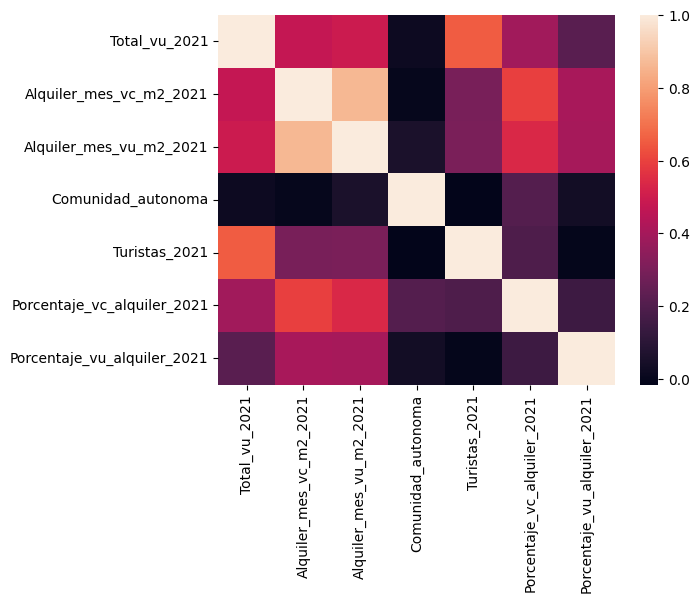

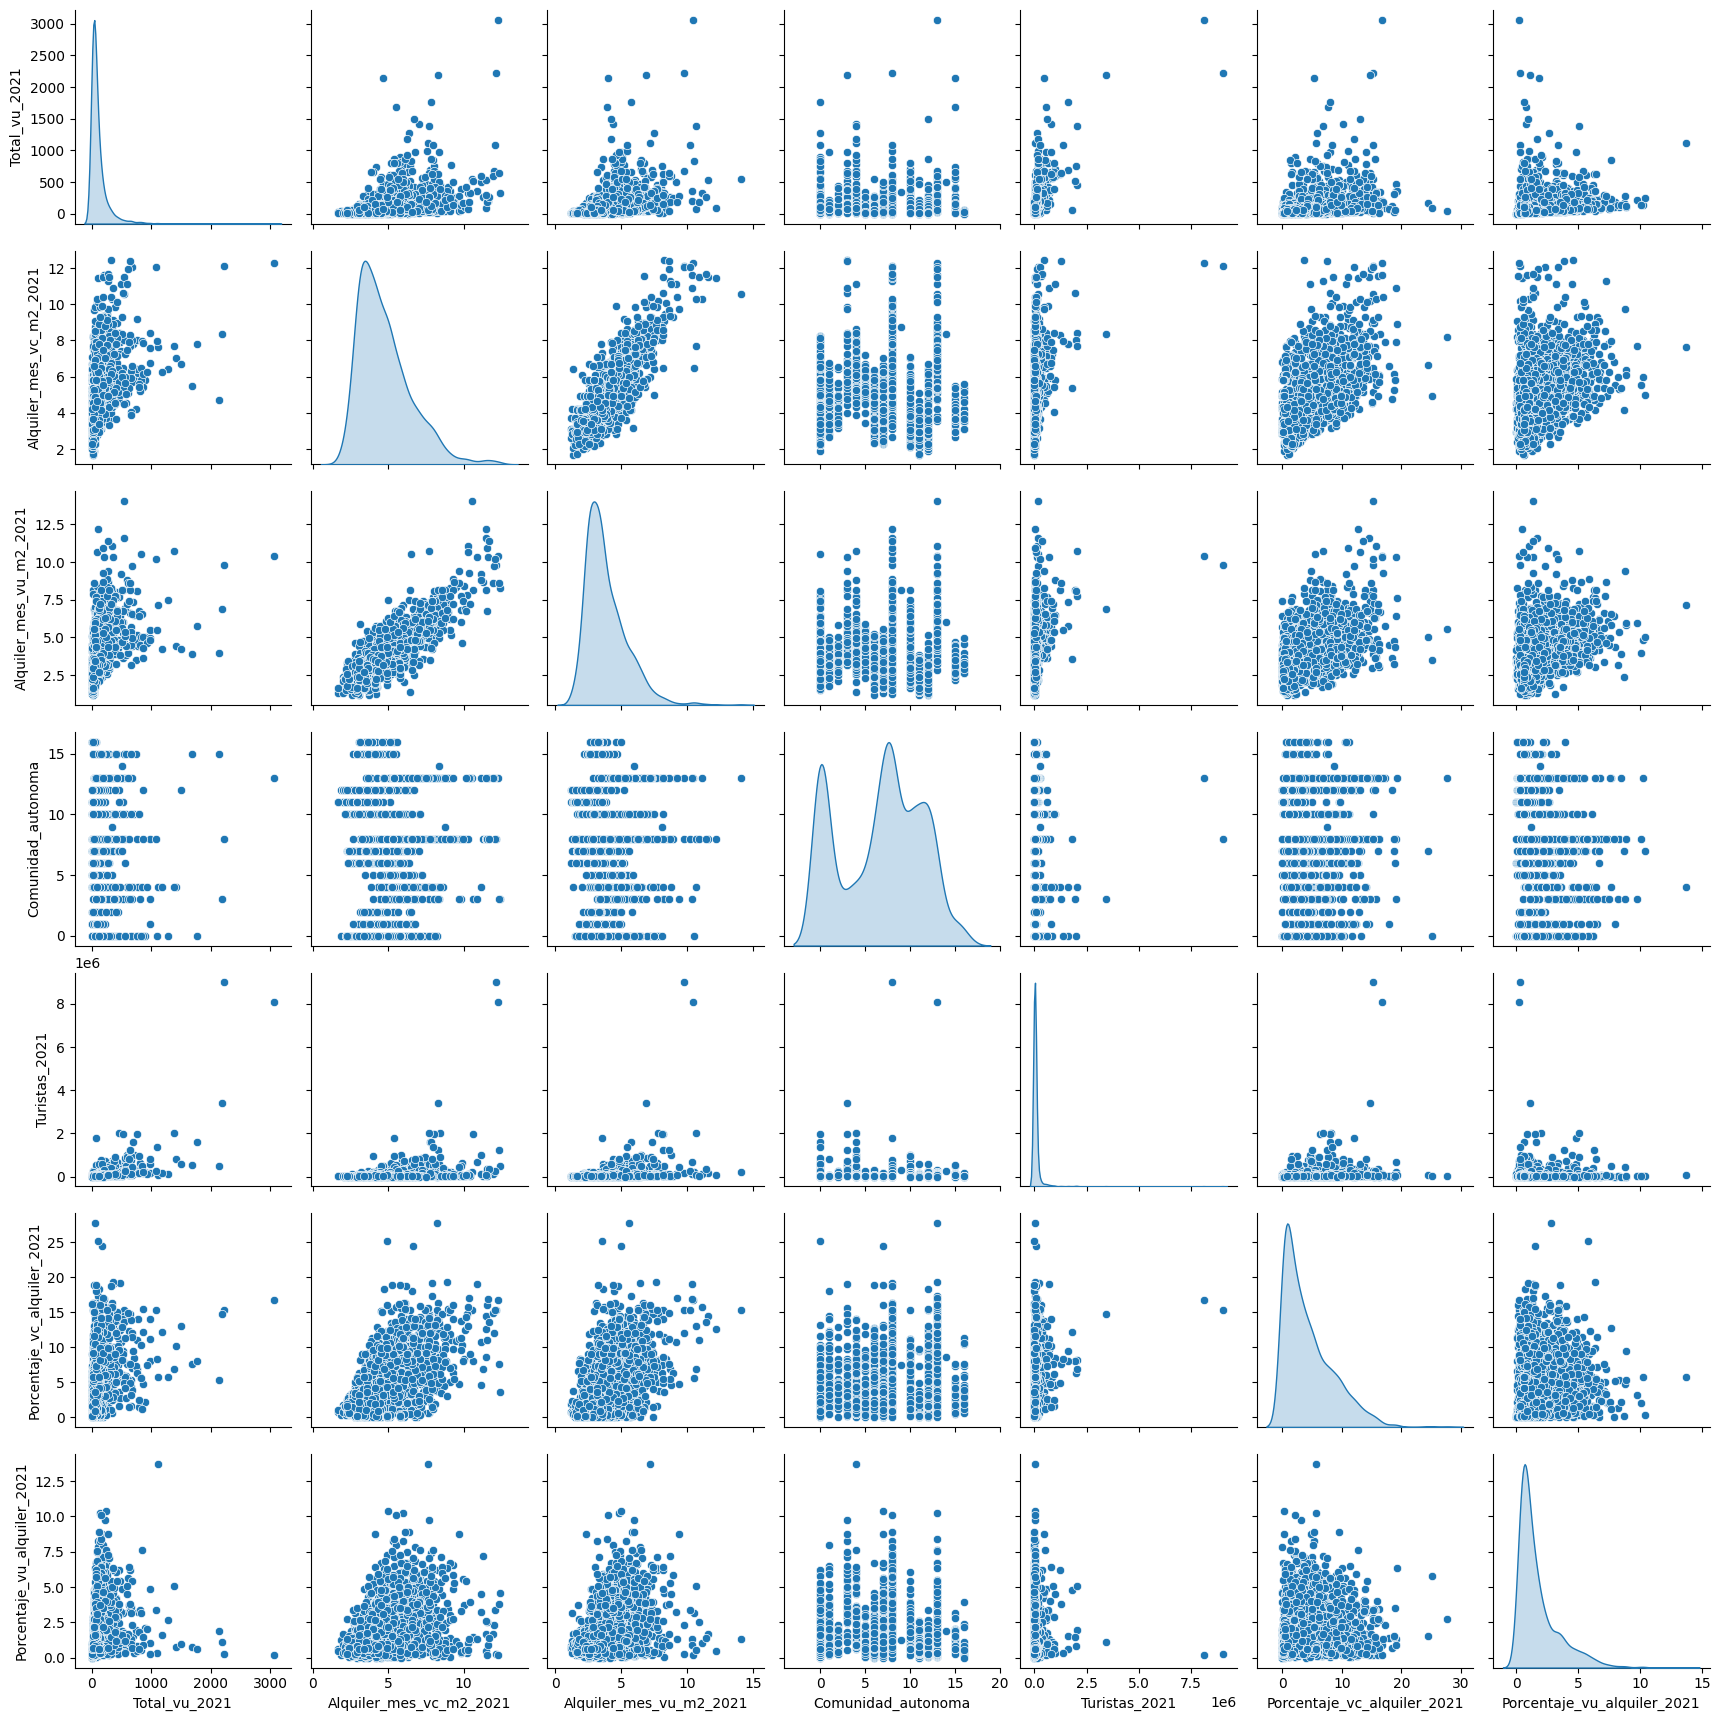

In [12]:
fn.get_bivariate_analysis(df_2021)

In [21]:
model, best_model = fn.get_best_model(X_train, Y_train, X_test, Y_test, 5, "R2", kmeans=False)

Baseline


,MAE,MAPE,MSE,RMSE,R2
GradientBoosting,0.500074,0.139951,0.485797,0.697230,0.794820
Random Forest,0.496298,0.139894,0.482971,0.697603,0.792995
XGBoost,0.511888,0.143560,0.505421,0.710929,0.785804
AdaBoost,0.633868,0.190872,0.663982,0.820167,0.722385
Polynomial Regression,0.552754,0.153775,0.792793,0.890389,0.673818
ElasticNet,0.653629,0.184968,0.808503,0.899168,0.662752
KNeighborsRegressor,0.980563,0.266881,1.835391,1.354766,0.223221
SuperVectorMachine,0.985343,0.260065,1.900169,1.378466,0.198879


The best methods based on R2 is GradientBoosting



Using the GradientBoosting model, the best params to aply are these {'GradientBoostingRegressor__learning_rate': 0.1, 'GradientBoostingRegressor__max_depth': 6, 'GradientBoostingRegressor__n_estimators': 71}. 
It has been obteing a R2 of 0.8052901668083408




Baseline test


,MAE,MAPE,MSE,RMSE,R2
GradientBoosting,0.498825,0.144921,0.485618,0.696863,0.803830
Random Forest,0.492987,0.142855,0.501249,0.707989,0.797516
XGBoost,0.515945,0.151270,0.506681,0.711815,0.795322
Polynomial Regression,0.535788,0.157576,0.540793,0.735386,0.781542
AdaBoost,0.635010,0.200666,0.676789,0.822672,0.726605
ElasticNet,0.684855,0.199600,0.876087,0.935995,0.646097
KNeighborsRegressor,1.019641,0.280195,1.923412,1.386871,0.223021
SuperVectorMachine,1.038009,0.283798,2.009979,1.417737,0.188052


The best methods based on R2 and after having done a test is GradientBoosting



Using the GradientBoosting model, the best params to aply are these {'GradientBoostingRegressor__learning_rate': 0.1, 'GradientBoostingRegressor__max_depth': 6, 'GradientBoostingRegressor__n_estimators': 71}. 
It has been obteing a R2 of 0.8038913973909556


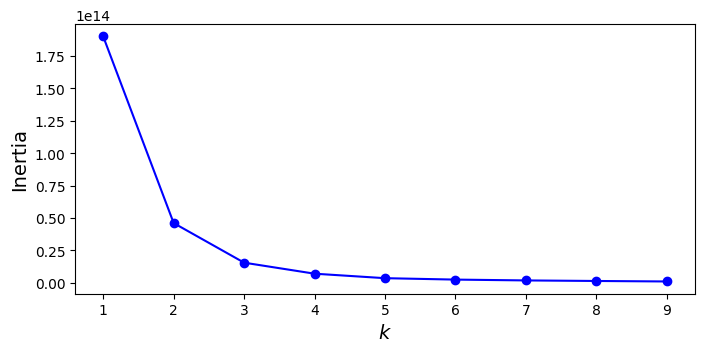

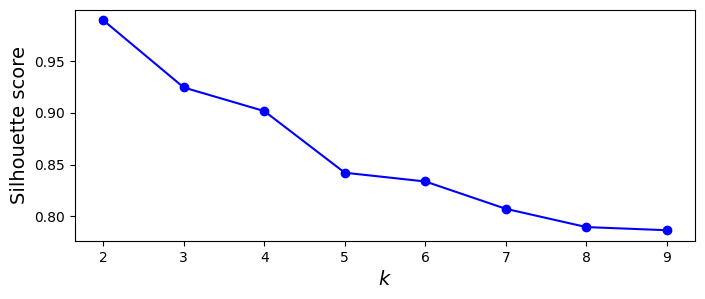

Baseline


,MAE,MAPE,MSE,RMSE,R2
Polynomial Regression,0.661557,0.184233,1.082164,1.037345,0.605420
GradientBoosting,1.009902,0.284667,1.818894,1.348339,0.229906
KNeighborsRegressor,1.072195,0.301352,2.069148,1.438453,0.123377
AdaBoost,1.165732,0.348389,2.091580,1.468097,0.103585
SuperVectorMachine,1.052987,0.278758,2.143966,1.464229,0.098939
XGBoost,1.096333,0.304687,2.174546,1.474634,0.075822
Random Forest,1.150777,0.321230,2.362392,1.533532,0.000400
ElasticNet,1.027614,0.288889,2.757384,1.660537,-0.189504


The best methods based on R2 is Polynomial Regression



Using the Polynomial Regression model, the best params to aply are these {'KMeans__n_clusters': 2, 'PolynomialFeatures__degree': 2, 'lr__fit_intercept': True}. 
It has been obteing a R2 of 0.6543077983675663




Baseline test


,MAE,MAPE,MSE,RMSE,R2
Polynomial Regression,0.675637,0.190847,0.856354,0.925394,0.654068
ElasticNet,1.083674,0.320071,1.957620,1.399150,0.209202
GradientBoosting,1.066691,0.307839,1.964134,1.401476,0.206571
AdaBoost,1.200467,0.382094,2.144390,1.464374,0.133755
KNeighborsRegressor,1.113826,0.317524,2.175757,1.475045,0.121085
SuperVectorMachine,1.113953,0.306915,2.267803,1.505923,0.083902
XGBoost,1.137464,0.321320,2.312910,1.520825,0.065680
Random Forest,1.212294,0.341959,2.633396,1.622774,-0.063783


The best methods based on R2 and after having done a test is Polynomial Regression



Using the Polynomial Regression model, the best params to aply are these {'KMeans__n_clusters': 2, 'PolynomialFeatures__degree': 2, 'lr__fit_intercept': True}. 
It has been obteing a R2 of 0.6543077983675663


In [13]:
mode_kmeans, best_model_kmeans = fn.get_best_model(X_train, Y_train, X_test, Y_test, 5, "R2", kmeans=True)

In [15]:
from sklearn.model_selection import GridSearchCV

rdf_pipe = Pipeline([
    ('RandomForestRegressor', RandomForestRegressor()),
])

param_grid = {
    "RandomForestRegressor__n_estimators": range(1, 100, 10),
    "RandomForestRegressor__max_depth": range(3, 10),
    "RandomForestRegressor__min_samples_leaf": range(1, 20),
    "RandomForestRegressor__max_leaf_nodes": range(1, 20)
}

grid_search = GridSearchCV(estimator=rdf_pipe,
                            param_grid=param_grid,
                            cv=5,
                            scoring="r2")

grid_search.fit(X_train, Y_train)

print(
    f"Using the Random Forest model, the best params to aply are these {grid_search.best_params_}. ")
print(f"It has been obteing a R2 of {abs(grid_search.best_score_)}")

Using the Random Forest model, the best params to aply are these {'RandomForestRegressor__max_depth': 8, 'RandomForestRegressor__max_leaf_nodes': 19, 'RandomForestRegressor__min_samples_leaf': 8, 'RandomForestRegressor__n_estimators': 31}. 
It has been obteing a R2 of 0.7831765568444687


In [14]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# XGBoost pipeline
xgb_pipe = Pipeline([
    ('XGBRegressor', xgb.XGBRegressor()),
])

param_grid = { 
    "XGBRegressor__n_estimators": range(1, 100, 10),
    "XGBRegressor__max_depth": range(3, 10),
    "XGBRegressor__alpha": [0, 0.01, 0.1],
    "XGBRegressor__lambda": [0, 0.01, 0.1]
}

grid_search = GridSearchCV(estimator=xgb_pipe,
                            param_grid=param_grid,
                            cv=5,
                            scoring="r2")

grid_search.fit(X_train, Y_train)

print(
    f"Using the Random Forest model, the best params to aply are these {grid_search.best_params_}. ")
print(f"It has been obteing a R2 of {abs(grid_search.best_score_)}")

Using the Random Forest model, the best params to aply are these {'XGBRegressor__alpha': 0.01, 'XGBRegressor__lambda': 0.1, 'XGBRegressor__max_depth': 5, 'XGBRegressor__n_estimators': 21}. 
It has been obteing a R2 of 0.7999785387075897


In [18]:
final_model = Pipeline([
            ('GradientBoostingRegressor', GradientBoostingRegressor(learning_rate=0.1, max_depth=6, n_estimators=71)),
        ])

In [19]:
final_model.fit(X_train, Y_train)

Pipeline(steps=[('GradientBoostingRegressor',
                 GradientBoostingRegressor(max_depth=6, n_estimators=71))])

In [20]:
prediction = final_model.predict(X_test)

In [13]:
from sklearn.metrics import r2_score
r2_score(Y_test, prediction)

0.8039329842840021

In [23]:
from sklearn.metrics import r2_score

df_init
# Se crea una lista con las columnas cuyo nombre termina en "2020"
col_to_drop = [col for col in df_init.columns if col.endswith("2020")]

# Se eliminan las variables con 2020 al final
df_2021 = df_init.drop(col_to_drop, axis=1)

df_2021.columns = [re.sub(r"_20\d{2}$", '', col) for col in df_2021.columns]

df_2021.drop(["Provincia", "Codigo_municipio","Codigo_provincia"],axis=1, inplace=True)
df_2021.drop(df_features[6:].index, axis=1, inplace=True)




encoder=OrdinalEncoder()
df_2021[["Comunidad_autonoma"]] = encoder.fit_transform(df_2021[["Comunidad_autonoma"]])
print(df_2021.head())


final_model = Pipeline([
            ('GradientBoostingRegressor', GradientBoostingRegressor(learning_rate=0.1, max_depth=6, n_estimators=71)),
            ])

final_model = final_model.fit(X_train, Y_train)

r2_score(Y_test, final_model.predict(X_test))


          Total_vu  Alquiler_mes_vc_m2  Alquiler_mes_vu_m2   
Abadín         9.0            2.821674            2.205769  \
Abanilla      27.0            3.016350            2.500000   
Abarán        52.0            3.000000            2.876485   
Abegondo      56.0            3.660036            3.473607   
Abrera       140.0            7.142857            7.054119   

          Comunidad_autonoma  Turistas  Porcentaje_vc_alquiler   
Abadín                  12.0      2147                0.000000  \
Abanilla                15.0     23013                0.446130   
Abarán                  15.0      3356                2.917611   
Abegondo                12.0      4365                0.223857   
Abrera                   8.0     43430                7.166916   

          Porcentaje_vu_alquiler  
Abadín                  0.541516  
Abanilla                0.602275  
Abarán                  0.786092  
Abegondo                1.790854  
Abrera                  2.619760  


0.7998015102084576

In [22]:
df_init
# Se crea una lista con las columnas cuyo nombre termina en "2020"
col_to_drop = [col for col in df_init.columns if col.endswith("2020")]

# Se eliminan las variables con 2020 al final
df_2021 = df_init.drop(col_to_drop, axis=1)

df_2021.drop(["Provincia", "Codigo_municipio","Codigo_provincia"],axis=1, inplace=True)
df_2021.drop(df_features[6:].index, axis=1, inplace=True)

print(df_2021.head())

preprocessor = ColumnTransformer([
    ("label_encoder", OrdinalEncoder(), ["Comunidad_autonoma"])
])

final_model = Pipeline([
            ("label_encoder", preprocessor),
            ('GradientBoostingRegressor', GradientBoostingRegressor(learning_rate=0.1, max_depth=6, n_estimators=71)),
            ])

final_model = final_model.fit(X_train,Y_train)

r2_score(Y_test, final_model.predict(X_test))

          Total_vu_2021  Alquiler_mes_vc_m2_2021  Alquiler_mes_vu_m2_2021   
Abadín              9.0                 2.821674                 2.205769  \
Abanilla           27.0                 3.016350                 2.500000   
Abarán             52.0                 3.000000                 2.876485   
Abegondo           56.0                 3.660036                 3.473607   
Abrera            140.0                 7.142857                 7.054119   

         Comunidad_autonoma  Turistas_2021  Porcentaje_vc_alquiler_2021   
Abadín              Galicia           2147                     0.000000  \
Abanilla  Murcia, Región de          23013                     0.446130   
Abarán    Murcia, Región de           3356                     2.917611   
Abegondo            Galicia           4365                     0.223857   
Abrera             Cataluña          43430                     7.166916   

          Porcentaje_vu_alquiler_2021  
Abadín                       0.541516  
Abanil

0.37613169932440316

In [16]:
# from sklearn.metrics import r2_score

# df_init
# # Se crea una lista con las columnas cuyo nombre termina en "2020"
# col_to_drop = [col for col in df_init.columns if col.endswith("2020")]

# # Se eliminan las variables con 2020 al final
# df_2021 = df_init.drop(col_to_drop, axis=1)
# df_2021.columns = [re.sub(r"_20\d{2}$", '', col) for col in df_2021.columns]

# df_2021.drop(["Provincia", "Codigo_municipio","Codigo_provincia"],axis=1, inplace=True)
# df_2021.drop(df_features[6:].index, axis=1, inplace=True)

# final_model = fn.get_final_model(df_2021, "Comunidad_autonoma", "Alquiler_mes_vu_m2", "./models/final_model.pkl")

# df_2021

# r2_score(df_2021["Alquiler_mes_vu_m2"], fn.get_prediction(final_model, df_2021.drop("Alquiler_mes_vu_m2", axis=1), "Comunidad_autonoma"))

Se ha exportado el modelo final a la ruta: ./models/final_model.pkl


0.9518540156354648

In [76]:
# from sklearn.preprocessing import StandardScaler, OrdinalEncoder
# import joblib


# df_init
# # Se crea una lista con las columnas cuyo nombre termina en "2020"
# col_to_drop = [col for col in df_init.columns if col.endswith("2020")]

# # Se eliminan las variables con 2020 al final
# df_2021 = df_init.drop(col_to_drop, axis=1)

# df_2021.columns = [re.sub(r"_20\d{2}$", '', col) for col in df_2021.columns]

# df_2021.drop(["Provincia", "Codigo_municipio","Codigo_provincia"], axis=1, inplace=True)
# # df_2021.drop(df_features[6:].index, axis=1, inplace=True)

# print(df_2021.head())

# final_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=6, n_estimators=71)

# final_model = final_model.fit(df_2021.drop(columns=["Alquiler_mes_vu_m2"]), df_2021["Alquiler_mes_vu_m2"])

# ruta = "./models/final_model.pkl"
# joblib.dump(final_model, ruta)

# print(f"Se ha exportado el modelo final a la ruta: {ruta}")

          Total_vc  Total_vu  Alquiler_mes_vc_m2  Alquiler_mes_vu_m2   
Abadín         0.0       9.0            2.821674            2.205769  \
Abanilla      20.0      27.0            3.016350            2.500000   
Abarán       193.0      52.0            3.000000            2.876485   
Abegondo       7.0      56.0            3.660036            3.473607   
Abrera       383.0     140.0            7.142857            7.054119   

         Comunidad_autonoma  Poblacion  Inmuebles_totales   
Abadín              Galicia     2297.0             1662.0  \
Abanilla  Murcia, Región de     6116.0             4483.0   
Abarán    Murcia, Región de    13066.0             6615.0   
Abegondo            Galicia     5494.0             3127.0   
Abrera             Cataluña    12620.0             5344.0   

          Viviendas_turisticas  Turistas  Porcentaje_viviendas_turisticas   
Abadín                      10      2147                         0.601685  \
Abanilla                    34     23013      

ValueError: could not convert string to float: 'Galicia'

In [24]:
df_init
# Se crea una lista con las columnas cuyo nombre termina en "2020"
col_to_drop = [col for col in df_init.columns if col.endswith("2021")]

# Se eliminan las variables con 2020 al final
df_2020 = df_init.drop(col_to_drop, axis=1)

print(df_2020.head())

df_2020.to_csv("app/data/last_year_data.csv", sep=";", index=True)



          Codigo_provincia  Provincia  Codigo_municipio  Total_vc_2020   
Abadín                  27       Lugo             27001     204.615385  \
Abanilla                30     Murcia             30001      15.000000   
Abarán                  30     Murcia             30002     188.000000   
Abegondo                15  Coruña, A             15001       7.000000   
Abrera                   8  Barcelona              8001     374.000000   

          Total_vu_2020  Alquiler_mes_vc_m2_2020  Alquiler_mes_vu_m2_2020   
Abadín             11.0                 2.793878                 1.346634  \
Abanilla           22.0                 3.036911                 1.546392   
Abarán             54.0                 2.961165                 2.727273   
Abegondo           60.0                 3.585766                 3.200000   
Abrera            153.0                 6.782946                 6.734083   

         Comunidad_autonoma  Poblacion_2020  Inmuebles_totales   
Abadín              Galici

In [66]:
df_init
# Se crea una lista con las columnas cuyo nombre termina en "2020"
col_to_drop = [col for col in df_init.columns if col.endswith("2021")]

# Se eliminan las variables con 2020 al final
df_2020 = df_init.drop(col_to_drop, axis=1)

df_2020 = df_2020.drop("Alquiler_mes_vu_m2_2020", axis=1)

print(df_2020.head())

df_2020.to_csv("data/processed/last_year_data_probe.csv", sep=";", index=True)


          Codigo_provincia  Provincia  Codigo_municipio  Total_vc_2020   
Abadín                  27       Lugo             27001     204.615385  \
Abanilla                30     Murcia             30001      15.000000   
Abarán                  30     Murcia             30002     188.000000   
Abegondo                15  Coruña, A             15001       7.000000   
Abrera                   8  Barcelona              8001     374.000000   

          Total_vu_2020  Alquiler_mes_vc_m2_2020 Comunidad_autonoma   
Abadín             11.0                 2.793878            Galicia  \
Abanilla           22.0                 3.036911  Murcia, Región de   
Abarán             54.0                 2.961165  Murcia, Región de   
Abegondo           60.0                 3.585766            Galicia   
Abrera            153.0                 6.782946           Cataluña   

          Poblacion_2020  Inmuebles_totales  Viviendas_turisticas_2020   
Abadín            2322.0             1662.0           

In [62]:
df_init
# Se crea una lista con las columnas cuyo nombre termina en "2020"
col_to_drop = [col for col in df_init.columns if col.endswith("2020")]

df_2021 = df_init.drop(col_to_drop, axis=1)

def clean_df(dataframe, str_column, drop_list=None, cleaning=True, not_encoder=False):

    dataframe.columns = [re.sub(r"_20\d{2}$", '', col) for col in dataframe.columns]

    df = dataframe.copy()

    encoder=OrdinalEncoder()
    df[[str_column]] = encoder.fit_transform(df[[str_column]])

    if cleaning==True:
        # df.columns = [re.sub(r"_20\d{2}$", '', col) for col in df.columns]
        df.drop(drop_list, axis=1, inplace=True)

        df_features = pd.read_csv("app/data/df_features.csv", sep=";", index_col=0)
        df.drop(df_features[6:].index, axis=1, inplace=True)
    else:
        pass

    if not_encoder==True:
        dataframe = dataframe[df.columns]
        return df
    
    return dataframe
    
df = clean_df(df_2021, "Comunidad_autonoma", ["Provincia", "Codigo_municipio","Codigo_provincia", "Alquiler_mes_vu_m2"], not_encoder=True)

df

,Total_vu,Alquiler_mes_vc_m2,Comunidad_autonoma,Turistas,Porcentaje_vc_alquiler,Porcentaje_vu_alquiler
Abadín,9.0,2.821674,12.0,2147,0.000000,0.541516
Abanilla,27.0,3.016350,15.0,23013,0.446130,0.602275
Abarán,52.0,3.000000,15.0,3356,2.917611,0.786092
Abegondo,56.0,3.660036,12.0,4365,0.223857,1.790854
Abrera,140.0,7.142857,8.0,43430,7.166916,2.619760
...,...,...,...,...,...,...
Íscar,61.0,3.611111,6.0,3021,3.541118,1.785192
Òdena,37.0,6.563283,8.0,13451,5.385996,2.214243
Ólvega,17.0,3.642857,6.0,18786,5.668359,0.719120
Órgiva,54.0,3.092784,0.0,28383,2.234637,1.587768


In [83]:
df = pd.read_csv("app/data/current_year_data.csv", sep=";", index_col=0)

columnas = pd.DataFrame(df.columns, columns=[""])
display(columnas)

df.columns = [re.sub(r"_\d{4}$", '', col) for col in df.columns]
df.drop("Alquiler_mes_vu_m2", axis=1, inplace=True)
display(df.head(3))

,
0,Codigo_provincia
1,Provincia
2,Codigo_municipio
3,Total_vc_2020
4,Total_vu_2020
5,Alquiler_mes_vc_m2_2020
6,Alquiler_mes_vu_m2_2020
7,Comunidad_autonoma
8,Poblacion_2020
9,Inmuebles_totales


,Codigo_provincia,Provincia,Codigo_municipio,Total_vc,Total_vu,Alquiler_mes_vc_m2,Comunidad_autonoma,Poblacion,Inmuebles_totales,Viviendas_turisticas,Turistas,Porcentaje_viviendas_turisticas,Total_casas_alquiler,Porcentaje_viviendas_alquiler,Porcentaje_vc_alquiler,Porcentaje_vu_alquiler
Abadín,27,Lugo,27001,204.615385,11.0,2.793878,Galicia,2322.0,1662.0,5,3050,0.300842,215.615385,12.973248,12.311395,0.661853
Abanilla,30,Murcia,30001,15.000000,22.0,3.036911,"Murcia, Región de",6097.0,4483.0,18,15516,0.401517,37.000000,0.825340,0.334597,0.490743
Abarán,30,Murcia,30002,188.000000,54.0,2.961165,"Murcia, Región de",13022.0,6615.0,1,11442,0.015117,242.000000,3.658352,2.842026,0.816327
